The purpose of this project is to analyze and understand the sentiment of people's opinions on the language model ChatGPT and the field of evolving AI. By utilizing the Natural Language Processing (NLTK) libraries, we will extract insights from tweets that mention these topics. The findings of this project will provide valuable insight into public perception and understanding of these cutting-edge technologies. By studying the sentiment of the tweets, we will be able to gauge whether people hold a positive, negative, or neutral view on ChatGPT and the field of evolving AI. Additionally, we can also determine the reasons for these sentiments, which can be used to further improve these technologies.

This project will require the use of various NLP techniques such as tokenization, sentiment analysis, and text classification. The NLTK libraries provide a vast collection of resources and tools that are essential for conducting this type of analysis. The goal of the project is not only to understand the sentiment of the tweets but also to use this information to drive future developments in the field of AI. The results of this project can be used by AI researchers, developers, and stakeholders to gain a better understanding of public opinion and sentiment towards their work. This project represents an important step in the ongoing dialogue between the public and the AI community, and it will contribute to the ongoing efforts to make AI more accessible, trustworthy, and beneficial for everyone.

In [59]:
# Loading nessacary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.data.path.append("<path to nltk_data>")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:

df = pd.read_csv(r'D:\new file d\NOTEBOOK\chatgpt-sentiment\scrap.csv')
df.head()

,Unnamed: 0,Date,Tweet
0,0,2022-12-31 23:37:08+00:00,ChatGPT or Copilot which amazes you the most ?...
1,1,2022-12-31 23:37:08+00:00,"Sup crypto fam,\n\nDo you think ChatGPT provid..."
2,2,2022-12-31 23:37:08+00:00,Happy new year you all🥁\n\n#ChatGPT is not #A...
3,3,2022-12-31 23:36:03+00:00,ChatGPT or Copilot which amazes you the most ?...
4,4,2022-12-31 23:32:58+00:00,Happy new year you all🥁\n\n#ChatGPT is not #A...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4932 non-null   int64 
 1   Date        4932 non-null   object
 2   Tweet       4932 non-null   object
dtypes: int64(1), object(2)
memory usage: 115.7+ KB


In [62]:
# Remove punctuation and convert to lowercase
df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','').str.lower()

C:\Users\Asus\AppData\Local\Temp\ipykernel_19112\248547497.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('[^\w\s]','').str.lower()


In [63]:
# Remove stop words
stop_words = set(stopwords.words("english"))
df['Tweet'] = df['Tweet'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

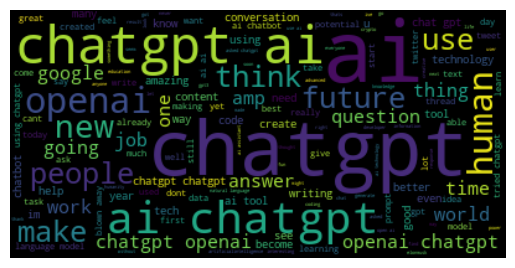

In [64]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [65]:
# Tokenize the text
df['Tokenized'] = df['Tweet'].apply(word_tokenize)

In [66]:
# Convert the text into numerical data using bag-of-words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Tweet'])


In [67]:
# Apply the sentiment analysis model
sia = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Tweet'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [68]:
# Categorize the sentiment as positive, negative, or neutral
df['Sentiment'] = df['Sentiment'].apply(lambda x: "positive" if x > 0 else "negative" if x < 0 else "neutral")

In [69]:
# View the sentiment predictions
print(df[['Tweet', 'Sentiment']])

                                                  Tweet Sentiment
0           chatgpt copilot amazes chatgpt developer ai  positive
1     sup crypto fam think chatgpt provides crypto t...   neutral
2     happy new year chatgpt ai library know answer ...  positive
3           chatgpt copilot amazes chatgpt developer ai  positive
4     happy new year chatgpt ai library know answer ...  positive
...                                                 ...       ...
4927  chatgpt wild conversationalcoding feels like p...  positive
4928  tried chatgpt im blown away ai language model ...  positive
4929  ai response wagmi openai chatgpt web3 fail wag...  negative
4930  used openai new ai system chatgpt optimized di...  positive
4931  bouncing ideas new ai friend gt yes power cont...  positive

[4932 rows x 2 columns]


In [70]:
df.head()

,Unnamed: 0,Date,Tweet,Tokenized,Sentiment
0,0,2022-12-31 23:37:08+00:00,chatgpt copilot amazes chatgpt developer ai,"[chatgpt, copilot, amazes, chatgpt, developer,...",positive
1,1,2022-12-31 23:37:08+00:00,sup crypto fam think chatgpt provides crypto t...,"[sup, crypto, fam, think, chatgpt, provides, c...",neutral
2,2,2022-12-31 23:37:08+00:00,happy new year chatgpt ai library know answer ...,"[happy, new, year, chatgpt, ai, library, know,...",positive
3,3,2022-12-31 23:36:03+00:00,chatgpt copilot amazes chatgpt developer ai,"[chatgpt, copilot, amazes, chatgpt, developer,...",positive
4,4,2022-12-31 23:32:58+00:00,happy new year chatgpt ai library know answer ...,"[happy, new, year, chatgpt, ai, library, know,...",positive


In [71]:
df["Date"] = pd.to_datetime(df["Date"])

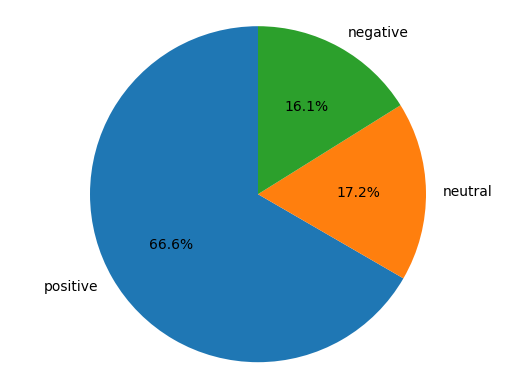

In [72]:
# Data to plot
sentiment_counts = df["Sentiment"].value_counts()

# Plot the pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [73]:
def map_sentiment(sentiment):
    if sentiment == "positive":
        return 1
    elif sentiment == "neutral":
        return 0
    elif sentiment == "negative":
        return -1
    else:
        return None


In [74]:
df["Sentiment"] = df["Sentiment"].apply(map_sentiment)


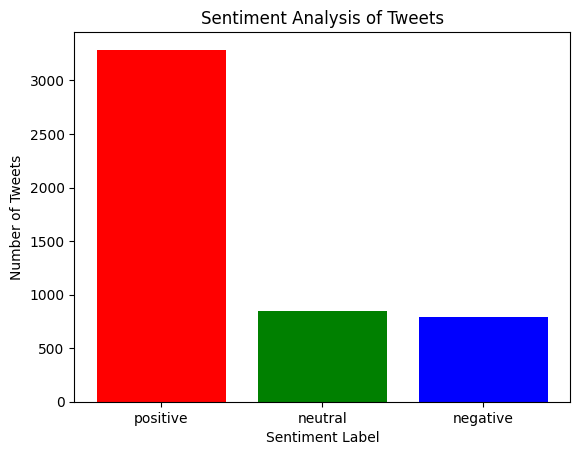

In [75]:
# create a new column for the sentiment labels
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'positive' if x == 1 else ('negative' if x == -1 else 'neutral'))

# count the number of tweets for each sentiment label
sentiment_counts = df['Sentiment_Label'].value_counts()
colors = ['red', 'green', 'blue']
# plot the bar graph
plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()